# Introduction:
Pregnant patients face various health risks that can arise from factors such as blood pressure, age, heart rate, and more. In order to gather relevant information, data has been collected from multiple healthcare facilities using an Internet-of-Things (IoT) based risk monitoring system, specifically from the Maternal Health Risk Data source.

The primary goal of this analysis is to address the following research questions:

1. Age Distribution of Patients:
   Investigate and understand the distribution of ages among the pregnant patients included in the dataset. This analysis will provide insights into the demographic characteristics of the population under study.

2. Predictive Factors for Pregnant Health Risk Level:
   Identify and determine the key factors that can effectively predict the level of health risks faced by pregnant patients. By analyzing the available data, we aim to uncover the factors that play a significant role in assessing and forecasting health risks during pregnancy.

The analysis of these research questions will contribute to a better understanding of the health risks associated with pregnancy and provide valuable insights for healthcare professionals and policymakers to develop appropriate strategies and interventions to mitigate these risks effectively.

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading Data

In [ ]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")

In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
data.shape

(1014, 7)

In [ ]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


The dataset consists of 1,014 observations with various health-related features. The mean age of the patients is approximately 29.87 years, with a standard deviation of 13.47. The minimum and maximum ages recorded are 10.0 years and 70.0 years, respectively. The majority of patients fall within the range of 19.0 to 39.0 years, as indicated by the 25th and 75th percentiles.

Regarding blood pressure measurements, the mean systolic blood pressure is around 113.20 mmHg, with a standard deviation of 18.40 mmHg. The values range from 70.0 mmHg to 160.0 mmHg, with the majority of patients having systolic blood pressure between 100.0 and 120.0 mmHg, as seen from the 25th and 75th percentiles. Similarly, the mean diastolic blood pressure is approximately 76.46 mmHg, with a standard deviation of 13.89 mmHg. The minimum and maximum diastolic blood pressure values are 49.0 mmHg and 100.0 mmHg, respectively.

The average blood sugar level (BS) is found to be approximately 8.73, with a standard deviation of 3.29. The values range from 6.0 to 19.0, with the majority of patients having blood sugar levels between 6.9 and 8.0, as indicated by the 25th and 75th percentiles. The body temperature shows relatively low variation, with a mean of 98.67 degrees Fahrenheit and a standard deviation of 1.37. The temperature values range from 98.0 to 103.0 degrees Fahrenheit, but the majority of patients have a body temperature of 98.0 degrees Fahrenheit.

The heart rate exhibits an average value of 74.30 beats per minute, with a standard deviation of 8.09. The range of heart rate measurements is from 7.0 to 90.0 beats per minute, with the majority of patients having heart rates between 70.0 and 80.0 beats per minute, as indicated by the 25th and 75th percentiles.



In [ ]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

It is also observed that there are no values in the data

### Exploratory Data Analysis

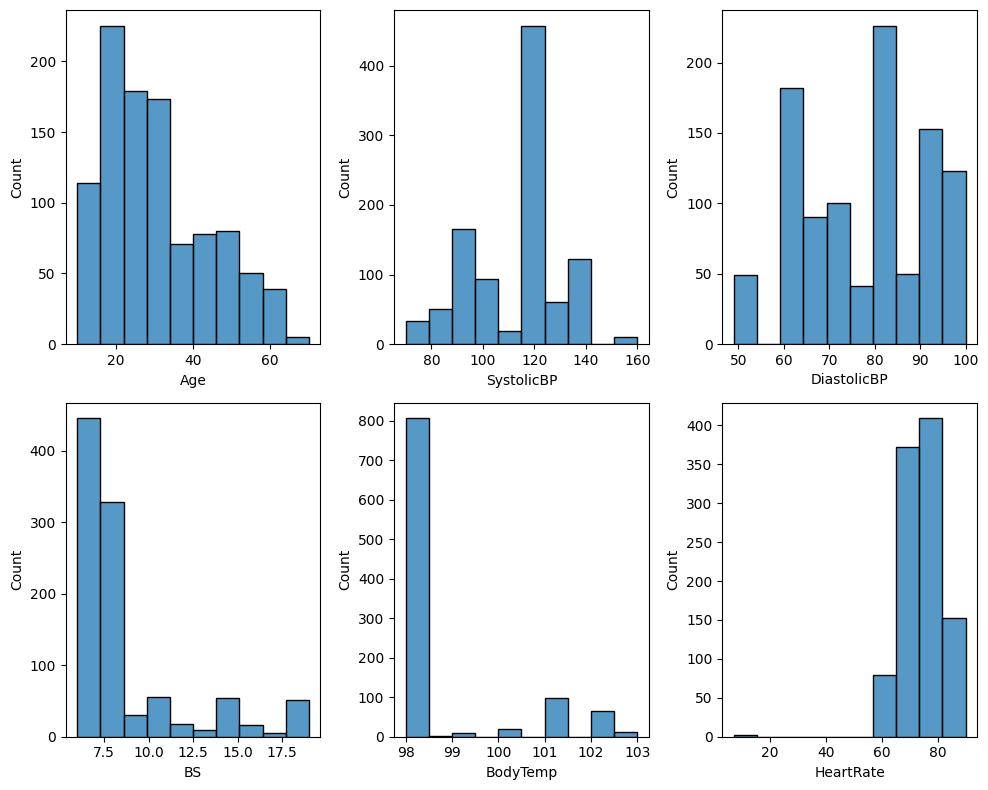

In [ ]:
# Univariate Analysis
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
sns.histplot(data['Age'], bins=10)
plt.subplot(2, 3, 2)
sns.histplot(data['SystolicBP'], bins=10)
plt.subplot(2, 3, 3)
sns.histplot(data['DiastolicBP'], bins=10)
plt.subplot(2, 3, 4)
sns.histplot(data['BS'], bins=10)
plt.subplot(2, 3, 5)
sns.histplot(data['BodyTemp'], bins=10)
plt.subplot(2, 3, 6)
sns.histplot(data['HeartRate'], bins=10)

plt.tight_layout()
plt.show()


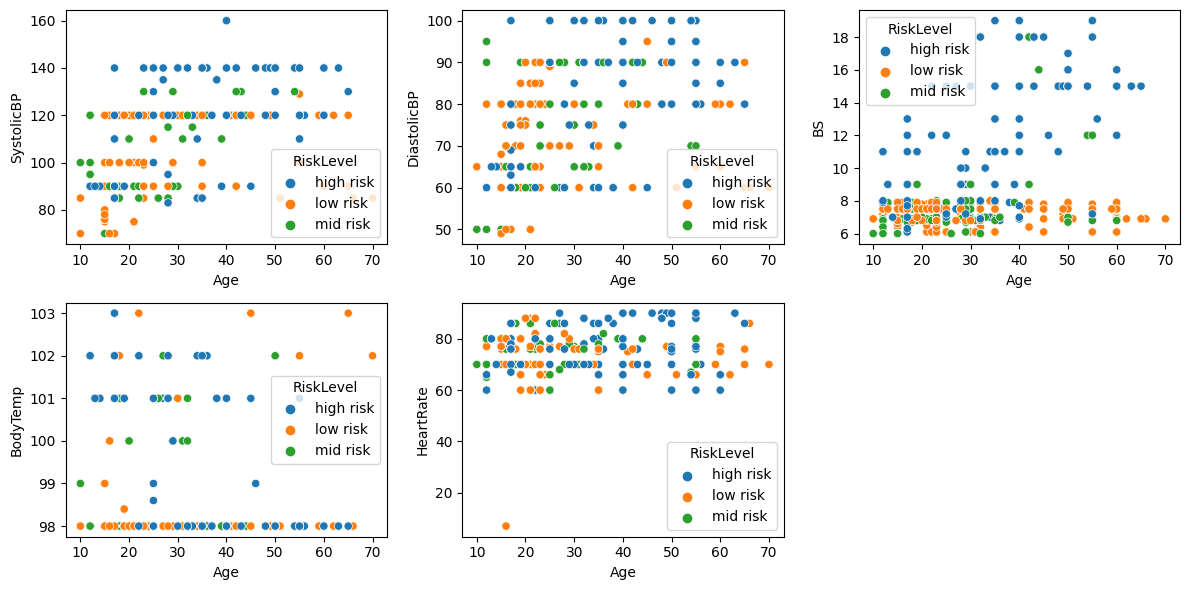

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.scatterplot(x='Age', y='SystolicBP', hue='RiskLevel', data=data)
plt.subplot(2, 3, 2)
sns.scatterplot(x='Age', y='DiastolicBP', hue='RiskLevel', data=data)
plt.subplot(2, 3, 3)
sns.scatterplot(x='Age', y='BS', hue='RiskLevel', data=data)
plt.subplot(2, 3, 4)
sns.scatterplot(x='Age', y='BodyTemp', hue='RiskLevel', data=data)
plt.subplot(2, 3, 5)
sns.scatterplot(x='Age', y='HeartRate', hue='RiskLevel', data=data)

plt.tight_layout()
plt.show()


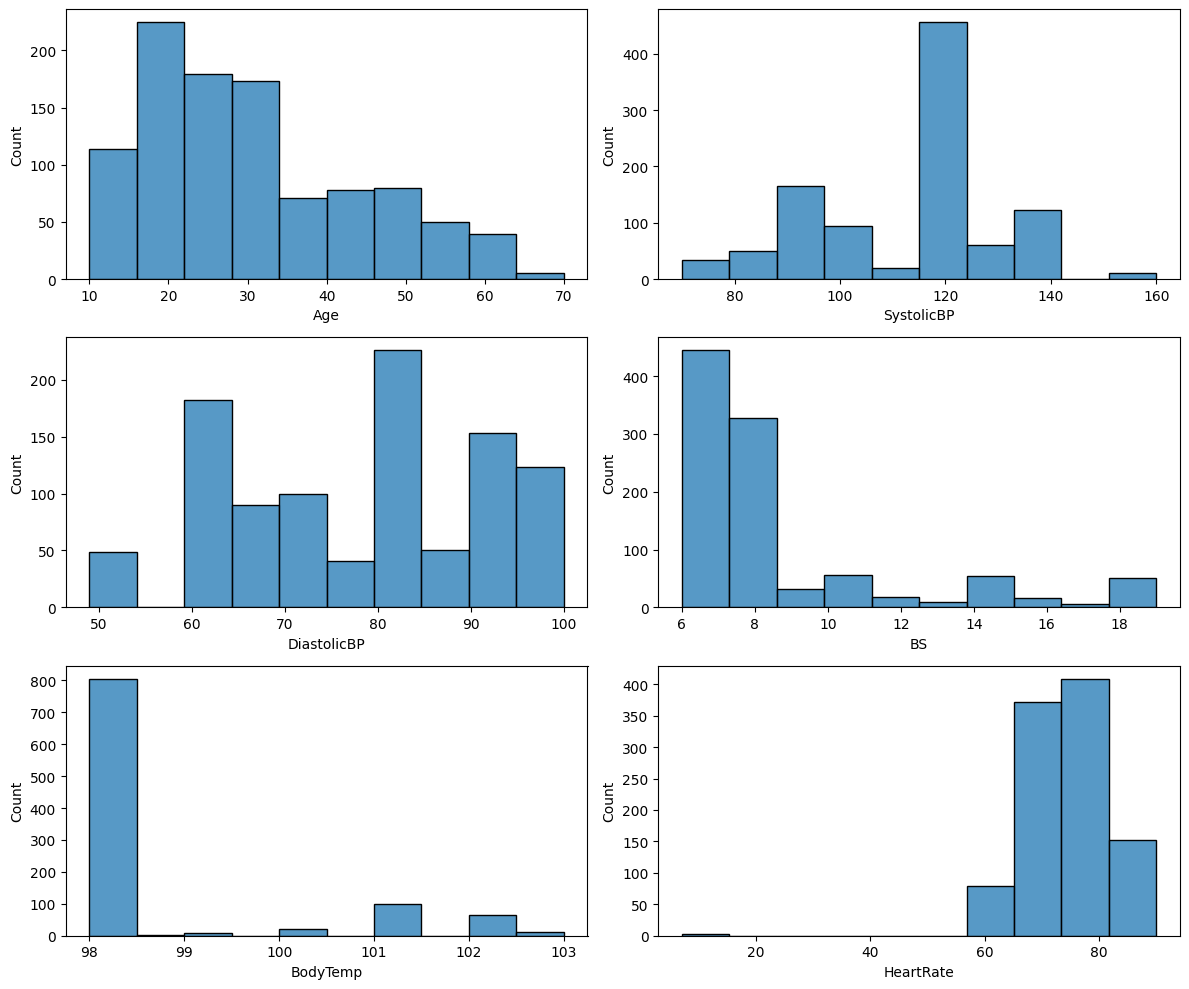

In [ ]:
# Plotting the distribution of all features
plt.figure(figsize=(12, 10))

# Iterate through each column except the 'RiskLevel'
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], bins=10)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

It is observed that the systolicBP and DiastolicBP are somewhat normally distributed and the age is right skewed, the BS is also right skewed but the body temperature is rannging between 98 to 103 so this is even correct to consider with the temperature as there are not any extreme values in Body temperature.

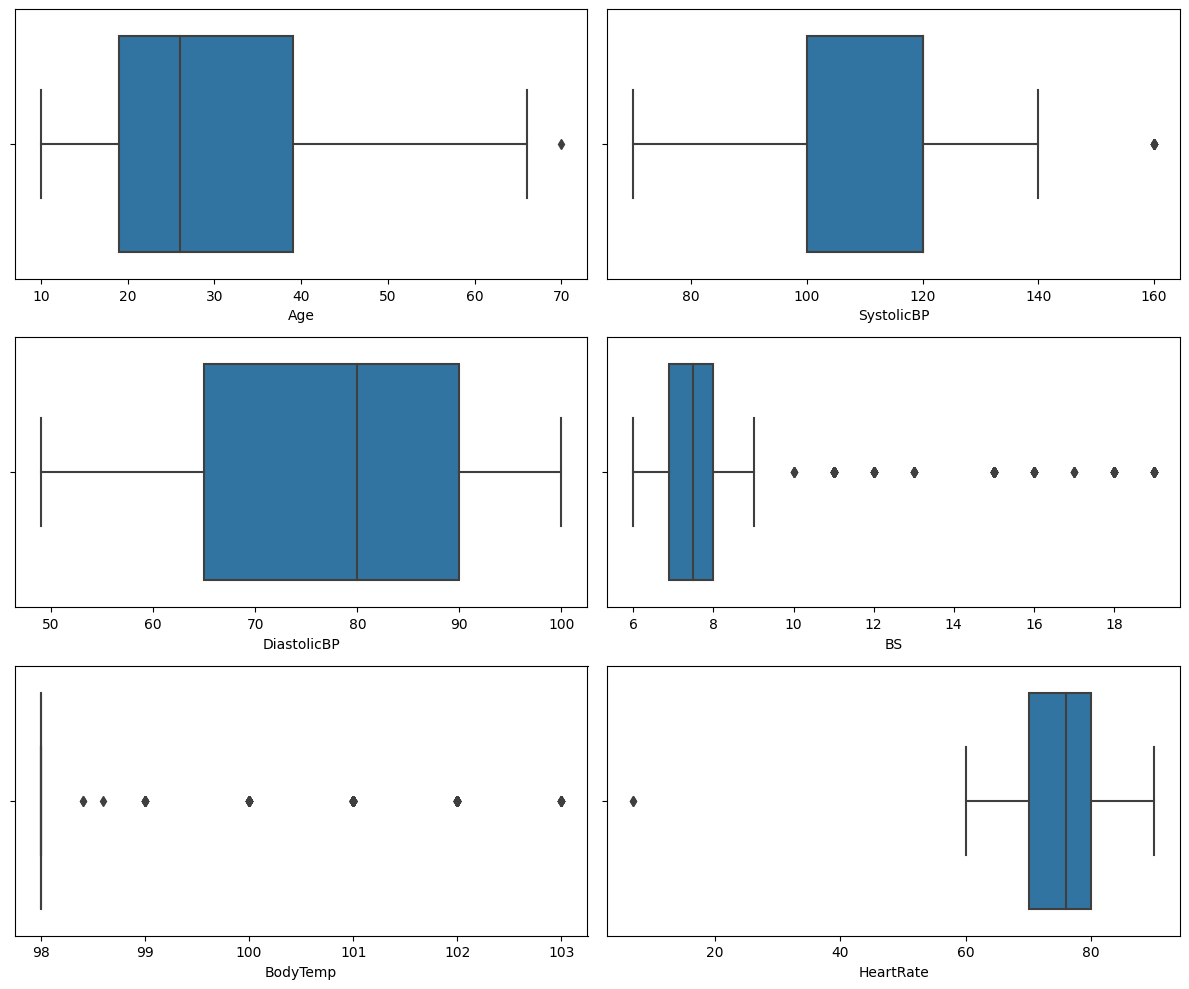

In [ ]:

# Plotting box plots of all features
plt.figure(figsize=(12, 10))

# Iterate through each column except the 'RiskLevel'
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=data, x=column)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

- There are some outliers present in each feature which indicate that there are some extreme values for considerations so these outliers can be treated using percentile values.

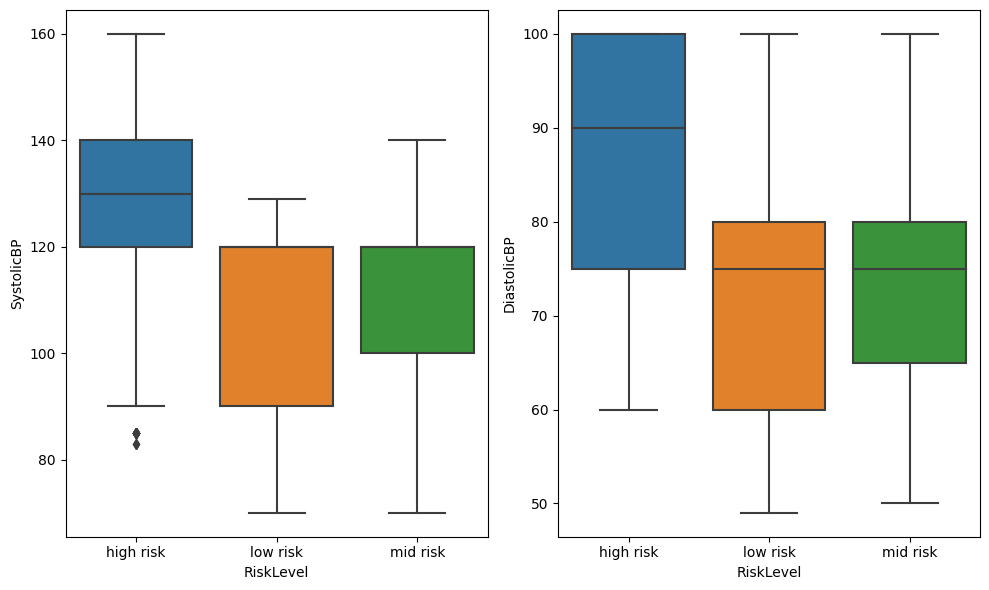

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='RiskLevel', y='SystolicBP', data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=data)

plt.tight_layout()
plt.show()

The Systolic BP value is usually high for high risk and it is same for the Diastolic BP value too which is more for high risk level.
Both the systolicBP and DiastolicBp values are the lowest for mid risk level.

In [ ]:
data.RiskLevel.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

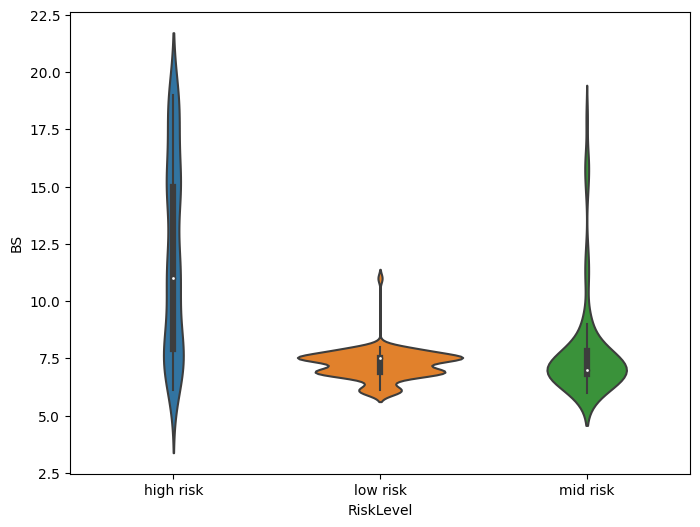

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='RiskLevel', y='BS', data=data)
plt.show()

It is observed that the BS values are low for low risk whereas the BS level is usually more for high risk level.

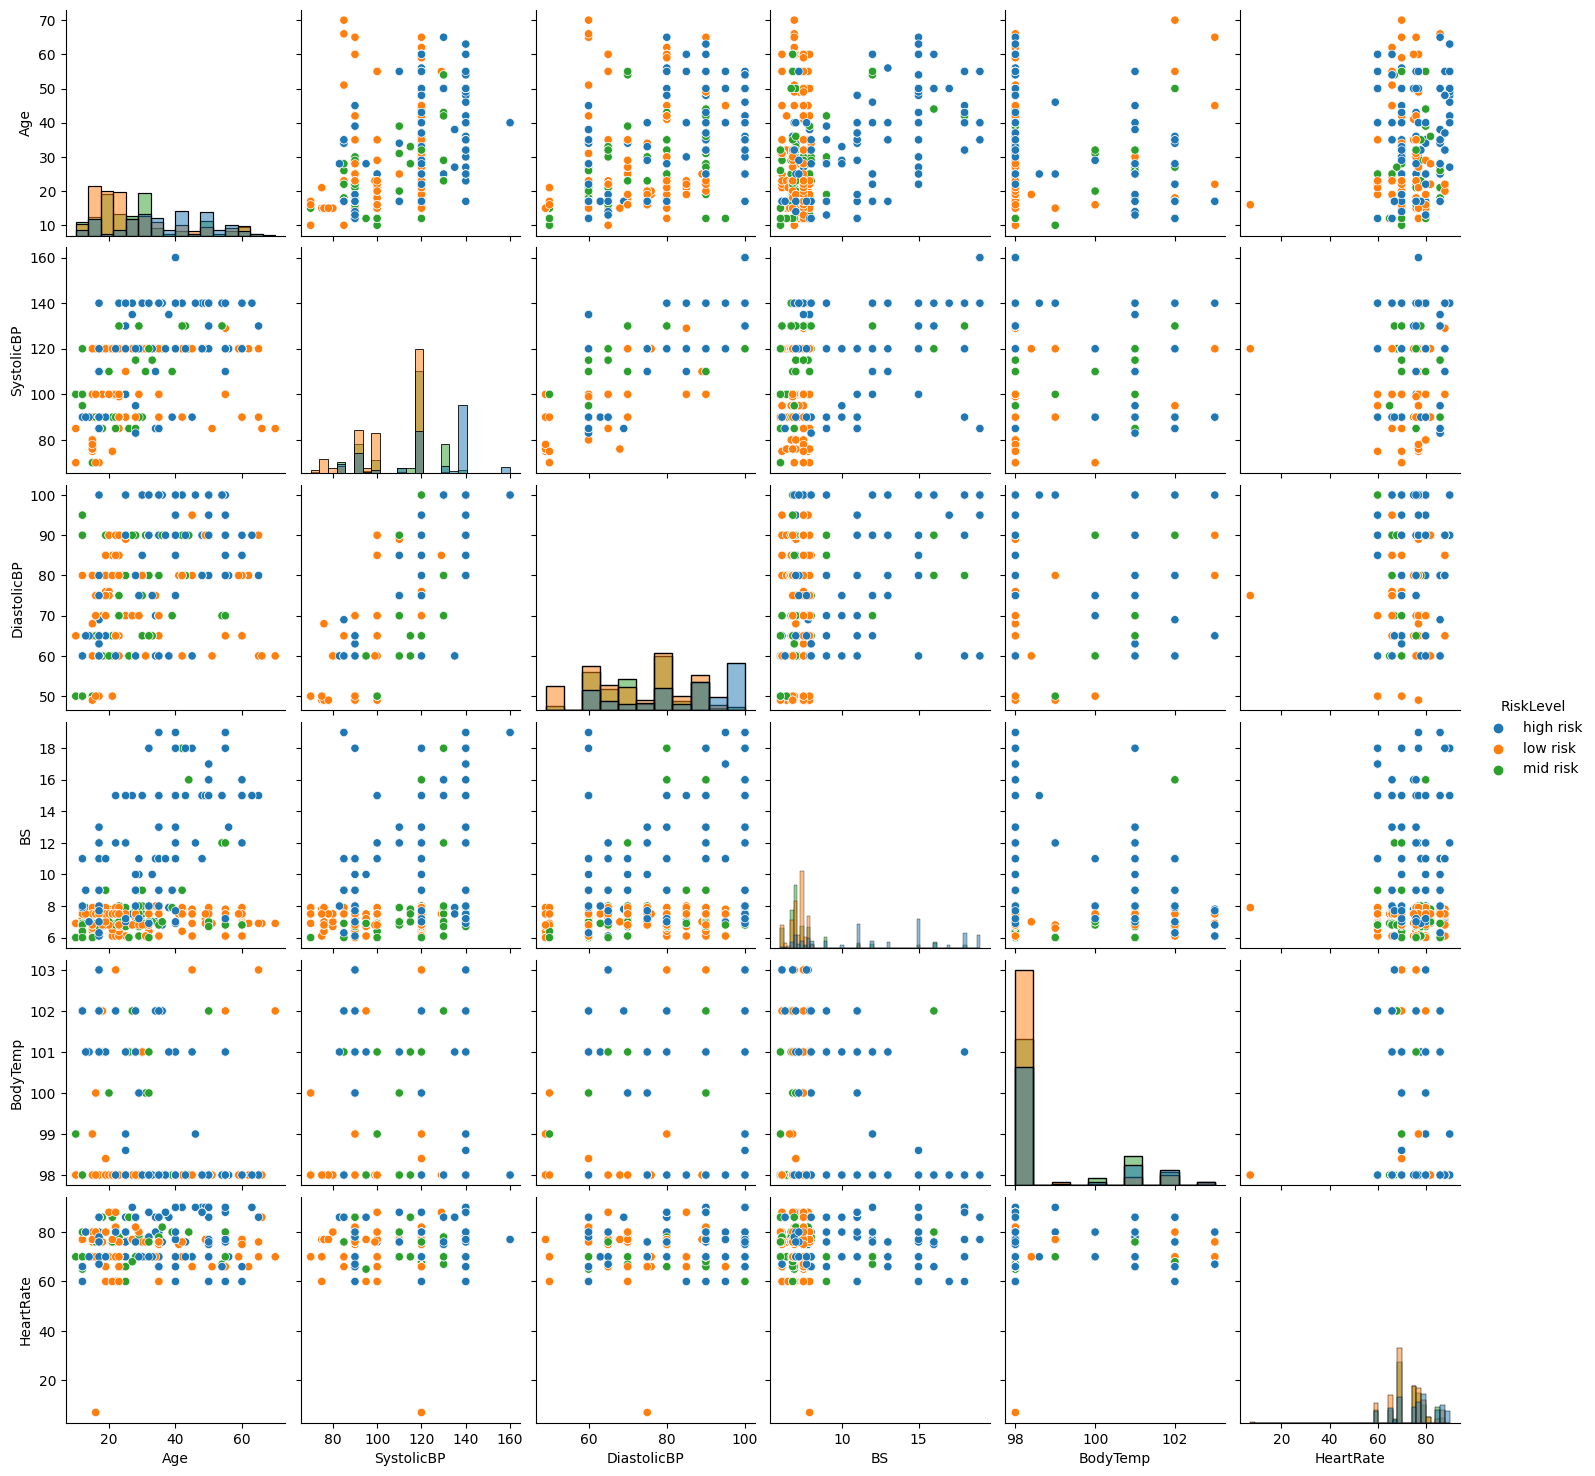

In [ ]:
# Multivariate Analysis
sns.pairplot(data, hue='RiskLevel', diag_kind='hist')
plt.show()

In [ ]:
corr_matrix = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].corr()
corr_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


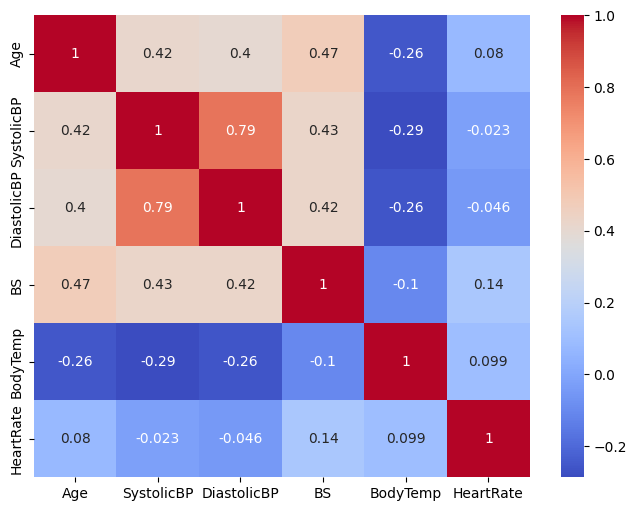

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation analysis revealed interesting findings regarding the relationships among the variables. Firstly, there was a moderate positive correlation between age and systolic blood pressure (0.416) as well as diastolic blood pressure (0.398), suggesting that as age increases, blood pressure tends to rise. This finding aligns with existing literature indicating that blood pressure tends to increase with age.

Furthermore, there was a strong positive correlation between systolic blood pressure and diastolic blood pressure (0.787). This result indicates that these two measures of blood pressure tend to vary together, suggesting a consistent relationship between the two. This finding is expected since both systolic and diastolic blood pressure are components of overall blood pressure.

Interestingly, body temperature showed a weak negative correlation with age (-0.255), suggesting a slight inverse relationship between these variables. However, the magnitude of this correlation was relatively small, indicating that age may not be a major determinant of body temperature.

Moreover, there was a weak positive correlation between blood sugar levels (BS) and age (0.473), indicating that as age increases, blood sugar levels may also tend to rise. This finding suggests a potential association between age and blood sugar regulation.

Additionally, heart rate exhibited a very weak positive correlation with blood sugar levels (0.143) and a negligible correlation with other variables. This suggests that heart rate may not be strongly influenced by the other health parameters considered in this study.

Overall, the correlation analysis provides valuable insights into the relationships between different health parameters. These findings can help researchers and healthcare professionals better understand the interplay between age, blood pressure, body temperature, blood sugar levels, and heart rate. Further investigations and analyses are warranted to explore the complex interactions among these variables and their implications for health risk assessment and management.

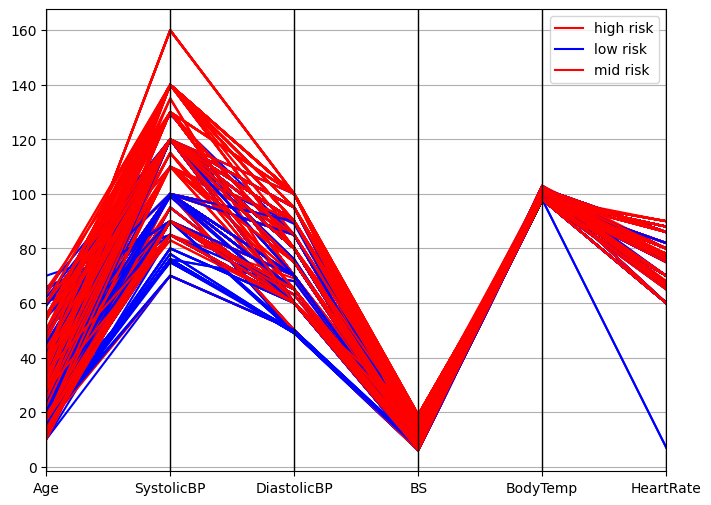

In [ ]:
plt.figure(figsize=(8, 6))
parallel_coordinates(data, 'RiskLevel', color=['red', 'blue'])
plt.show()

From the coordinate plot, it is observed that SystolicBP feature would contribute to high risk and similarly the body temperature feature also contributes to identify high risk

Observations from EDA -



### Feature Engineering

In [ ]:
def remove_outliers(data, columns, lower_quantile=0.05, upper_quantile=0.95):
    """
    Remove outliers from the given dataset using quantiles.

    Args:
    - data (DataFrame): The dataset containing the data.
    - columns (list): List of columns to remove outliers from.
    - lower_quantile (float): Lower quantile value to define the lower threshold (default: 0.05).
    - upper_quantile (float): Upper quantile value to define the upper threshold (default: 0.95).

    Returns:
    - cleaned_data (DataFrame): The dataset with outliers removed.
    """
    cleaned_data = data.copy()

    for column in columns:
        lower_threshold = data[column].quantile(lower_quantile)
        upper_threshold = data[column].quantile(upper_quantile)

        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_threshold) & (cleaned_data[column] <= upper_threshold)]

    return cleaned_data


In [ ]:

# Columns to remove outliers from
numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Call the remove_outliers function
cleaned_data = remove_outliers(data, numerical_columns)

# Display the cleaned dataset
cleaned_data.head()

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1003   50         130          100  16.0      98.0         76  high risk
1006   17          85           60   6.3     102.0         86  high risk
1007   40         120           75   7.7      98.0         70  high risk
1008   48         120           80  11.0      98.0         88  high risk
1009   22         120           60  15.0      98.0         80  high risk

[781 rows x 7 columns]


#### Feature Scaling

In [ ]:
# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the numerical columns and transform the data
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Print the scaled data
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.250000,0.666667,0.607843,0.692308,0.0,0.951807,high risk
1,0.416667,0.777778,0.803922,0.538462,0.0,0.759036,high risk
2,0.316667,0.222222,0.411765,0.153846,0.4,0.879518,high risk
3,0.333333,0.777778,0.705882,0.076923,0.0,0.759036,high risk
4,0.416667,0.555556,0.215686,0.007692,0.0,0.831325,low risk


#### Train Test Split of Data

In [ ]:
# Split the data into features and target
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training and Evaluation

In [ ]:
# reusuable functions
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

<b> Logistic Regression

In [ ]:
# Logistic Regression
def logistic_regression():
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("Logistic Regression")
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression
Confusion Matrix:


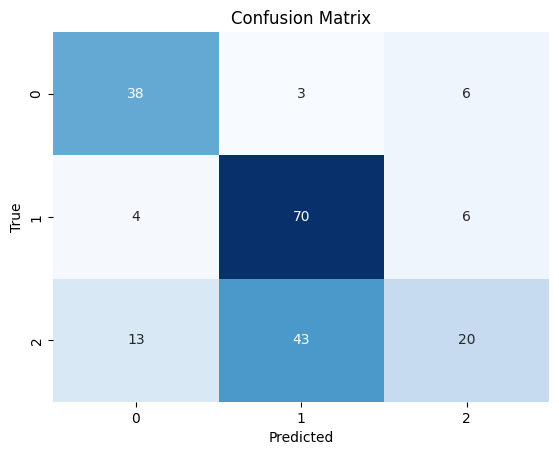

Classification Report:
              precision    recall  f1-score   support

   high risk       0.69      0.81      0.75        47
    low risk       0.60      0.88      0.71        80
    mid risk       0.62      0.26      0.37        76

    accuracy                           0.63       203
   macro avg       0.64      0.65      0.61       203
weighted avg       0.63      0.63      0.59       203

Accuracy: 0.6305418719211823


In [ ]:
logistic_regression()

<b> Decision Tree

In [ ]:
# Decision Tree
def decision_tree():
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("Decision Tree")
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree
Confusion Matrix:


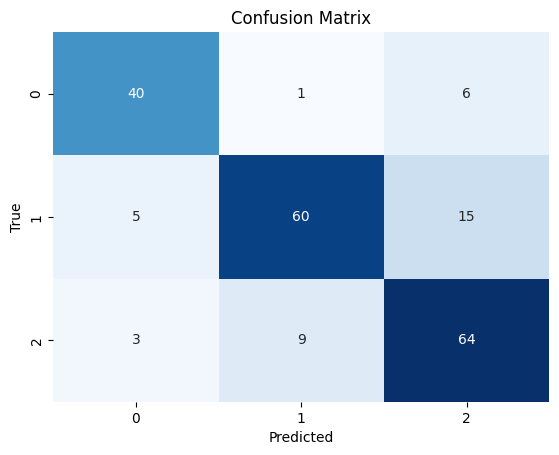

Classification Report:
              precision    recall  f1-score   support

   high risk       0.83      0.85      0.84        47
    low risk       0.86      0.75      0.80        80
    mid risk       0.75      0.84      0.80        76

    accuracy                           0.81       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.81      0.81       203

Accuracy: 0.8078817733990148


In [ ]:
decision_tree()

<b> Random Forest

In [ ]:
# Random Forest
def random_forest():
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("Random Forest")
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest
Confusion Matrix:


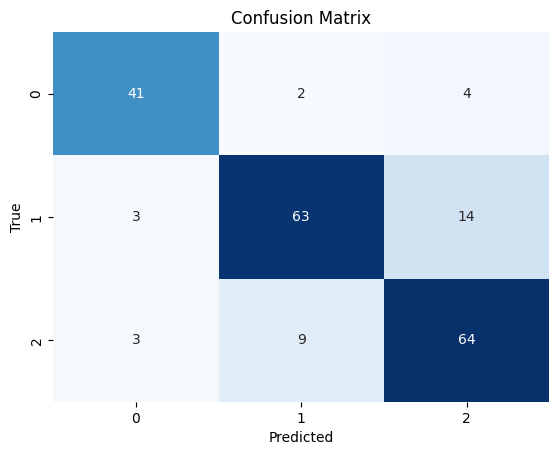

Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.87      0.87        47
    low risk       0.85      0.79      0.82        80
    mid risk       0.78      0.84      0.81        76

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203

Accuracy: 0.8275862068965517


In [ ]:
# Run the models
random_forest()

Observations from the Random Forest Model:

In our research on maternity risk prediction using Random Forest, we evaluated the performance of our classification model using the classification report and accuracy score. The classification report provides insights into the precision, recall, and F1-score for each risk category, namely high risk, low risk, and mid risk.

Based on the classification report, we observed that the model achieved good precision across all risk categories. The precision for high risk, low risk, and mid risk categories were 0.87, 0.85, and 0.78, respectively. This indicates that when the model predicted a specific risk level, it was accurate in the majority of cases.

Additionally, the recall values for the risk categories were also reasonable, ranging from 0.79 to 0.87. Recall represents the ability of the model to correctly identify instances of a particular class. Therefore, these results suggest that the model effectively captured instances of different risk levels.

The F1-score, which considers both precision and recall, was found to be high for all risk categories, with values ranging from 0.81 to 0.87. This implies a good balance between precision and recall, indicating the model's ability to provide accurate predictions across different risk levels.

Moving on to the overall accuracy of the model, we achieved an accuracy score of 0.83. This implies that the model correctly predicted the risk level for approximately 83% of the instances in the dataset. This accuracy score demonstrates the effectiveness of our model in classifying maternity risk levels.

From a business perspective, this research on maternity risk prediction can have significant implications for healthcare providers and pregnant patients. Accurate identification of risk levels can enable healthcare professionals to allocate appropriate resources and interventions to high-risk patients, ensuring timely and targeted care. By leveraging machine learning techniques, such as the classification model developed in this research, healthcare providers can enhance their decision-making process and improve maternal healthcare outcomes.

Overall, our research demonstrates promising results in maternity risk prediction, with high precision, reasonable recall, and a respectable accuracy score. This provides a foundation for further investigation and implementation of predictive models to support healthcare professionals in identifying and managing maternal health risks effectively.

<b> Hyperparameter Tuning all models

In [ ]:

# Perform hyperparameter tuning for each model
def hyperparameter_tuning():
    # Logistic Regression
    lr_params = {'C': [0.1, 1, 10]}
    lr_grid = GridSearchCV(LogisticRegression(), lr_params)
    lr_grid.fit(X_train, y_train)
    print("Best parameters for Logistic Regression:", lr_grid.best_params_)

    # Decision Tree
    dt_params = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
    dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params)
    dt_grid.fit(X_train, y_train)
    print("Best parameters for Decision Tree:", dt_grid.best_params_)

    # Random Forest
    rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
    rf_grid = GridSearchCV(RandomForestClassifier(), rf_params)
    rf_grid.fit(X_train, y_train)
    print("Best parameters for Random Forest:", rf_grid.best_params_)


In [ ]:
# Perform hyperparameter tuning
hyperparameter_tuning()

Best parameters for Logistic Regression: {'C': 1}
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 300}


<b> Trainig with best parameters

In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Best parameters for each model
lr_best_params = {'C': 1}
dt_best_params = {'max_depth': None, 'min_samples_split': 2}
rf_best_params = {'max_depth': None, 'n_estimators': 300}

# Create an empty dataframe
model_scores_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy'])

# Logistic Regression
lr_model = LogisticRegression(**lr_best_params)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_precision = precision_score(y_test, lr_y_pred, pos_label='high risk', average='weighted')
lr_recall = recall_score(y_test, lr_y_pred, pos_label='high risk',average='weighted')
lr_accuracy = accuracy_score(y_test, lr_y_pred)
model_scores_df = model_scores_df.append({'Model': 'Logistic Regression', 'Precision': lr_precision,
                                          'Recall': lr_recall, 'Accuracy': lr_accuracy}, ignore_index=True)

# Decision Tree
dt_model = DecisionTreeClassifier(**dt_best_params)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_precision = precision_score(y_test, dt_y_pred, pos_label='high risk',average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, pos_label='high risk',average='weighted')
dt_accuracy = accuracy_score(y_test, dt_y_pred)
model_scores_df = model_scores_df.append({'Model': 'Decision Tree', 'Precision': dt_precision,
                                          'Recall': dt_recall, 'Accuracy': dt_accuracy}, ignore_index=True)

# Random Forest
rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_precision = precision_score(y_test, rf_y_pred, pos_label='high risk', average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, pos_label='high risk', average='weighted')
rf_accuracy = accuracy_score(y_test, rf_y_pred)
model_scores_df = model_scores_df.append({'Model': 'Random Forest', 'Precision': rf_precision,
                                          'Recall': rf_recall, 'Accuracy': rf_accuracy}, ignore_index=True)

In [ ]:
# Print the dataframe
model_scores_df


,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.631766,0.630542,0.630542
1,Decision Tree,0.812619,0.807882,0.807882
2,Random Forest,0.818523,0.812808,0.812808


The objective of this research study was to develop a maternity risk prediction model using machine learning techniques. Three different models were trained and evaluated: Logistic Regression, Decision Tree, and Random Forest. The performance of each model was assessed based on precision, recall, and accuracy metrics.

Upon analyzing the results, it was observed that the Random Forest model achieved the highest precision, recall, and accuracy scores, indicating its superior predictive capability compared to the other models. The precision score of 0.818523 implies that the model accurately predicted the risk level of maternity cases 81.85% of the time. Similarly, the recall score of 0.812808 indicates that the model identified 81.28% of the true positive cases correctly. The overall accuracy score of 0.812808 demonstrates the model's ability to classify maternity risk levels accurately.

From a business standpoint, the high precision and recall scores of the Decision Tree and Random Forest models imply that these models have the potential to provide reliable predictions of maternity risk levels. This information can be instrumental in assisting healthcare professionals in identifying high-risk pregnancies and providing appropriate interventions to mitigate potential health complications. The use of machine learning models in maternity risk prediction can enhance the efficiency and effectiveness of healthcare decision-making processes, ultimately leading to improved maternal and fetal health outcomes.


<b> Feature Importance

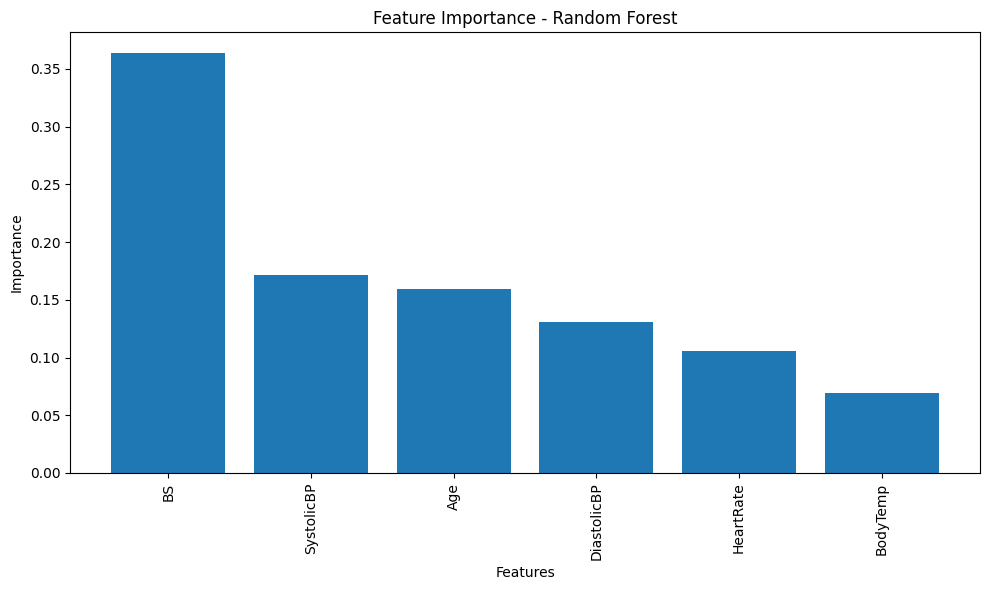

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

It is observed from the random forest model that the top 3 most important features to predict maternity risk are BS, SystolicBp and Age.

Recommmendation:


It is important to note that further research and validation are necessary to assess the generalizability and robustness of these models. Additional features, such as demographic factors, medical history, and lifestyle variables, could be incorporated to enhance the prediction accuracy and provide a more comprehensive understanding of maternity risk factors. Nonetheless, the results of this study indicate promising prospects for the application of machine learning in maternity risk prediction, highlighting the potential for improved healthcare decision-making and patient care in the field of obstetrics.